# Big-O and Subsequences

    Problem: Find the subarray with the highest total price change

In [3]:
import numpy as np

#import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

price_changes = np.random.normal(0, 1, size = 50)

# these random numbers are like changes to the stock price
# arranged as a normal distribution

In [4]:
price_changes

array([ 0.18529916, -0.03041576, -0.56628556, -0.59940511,  1.21054093,
        2.11029713, -0.32313974, -0.41981152,  1.9388268 ,  0.10135702,
       -0.08897482, -0.33294693,  0.28860079,  0.11188327,  1.47338904,
        1.03288591, -0.76341195,  0.12044594,  1.92106981,  0.07196976,
       -0.16604119,  0.60795361, -0.13923592,  1.91844425, -0.32351509,
        2.28861308, -0.54905312, -0.84252103,  2.67067246, -0.14818995,
       -2.18610688, -0.50476295, -0.53127296,  0.30517874, -0.2368405 ,
        1.92308681,  0.10776415, -0.11482988, -0.23360979, -1.18764031,
        0.0163679 , -1.130295  ,  0.20233891, -0.2948706 ,  1.71246939,
       -1.24315401,  0.58882606,  1.42062374,  0.14275897, -0.2920093 ])

Text(0.5, 1.0, 'Price Changes over time')

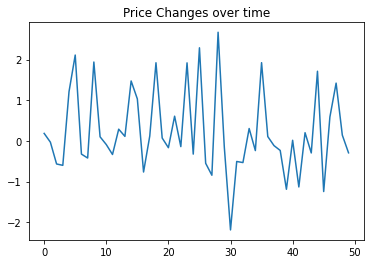

In [6]:
plt.plot(price_changes)
plt.title('Price Changes over time')

## Max Subsequence sum - Problem at hand

In [7]:
# we need to choose a window inside this sequence that has the biggest total change

---

## Basic Start with Naive algorightm

## My Modification

In [18]:
best = price_changes[0]

for start in range(len(price_changes)):
    for end in range(start + 1, len(price_changes)):
        # we need to loop through each of these to find the best
        
#        print('start',price_changes[start])
#        print('end', price_changes[end])
#        print('price difference', sum(price_changes[start:end]))
#        print('best', best)
#        if sum(price_changes[start:end]) > best:
        if (price_changes[end] - price_changes[start]) > best:
#            best = sum(price_changes[start:end])
            best = (price_changes[end] - price_changes[start])
            
print(best)

4.10919368650927


<font size = 5, color = green> Wrong assumption -- the inner loop runs through the full set (is 2-20, 3-50, 4-50, 5-50 etc)

## Class Solution (Does not work) -- maybe this is actually the case (for SUM of a subsequence)

In [19]:
best = price_changes[0]

for start in range(len(price_changes)):
    for end in range(start + 1, len(price_changes)+1):
        # we need to loop through each of these to find the best
        
#        print('start',price_changes[start])
#        print('end', price_changes[end])
#        print('price difference', sum(price_changes[start:end]))
#        print('best', best)
        if sum(price_changes[start:end]) > best:
#        if (price_changes[end] - price_changes[start]) > best:
            best = sum(price_changes[start:end])
#            best = (price_changes[end] - price_changes[start])

print(best)

13.918298507806366


<font size = 6, color = red> $\Theta(n^2)$

### class solution does not work

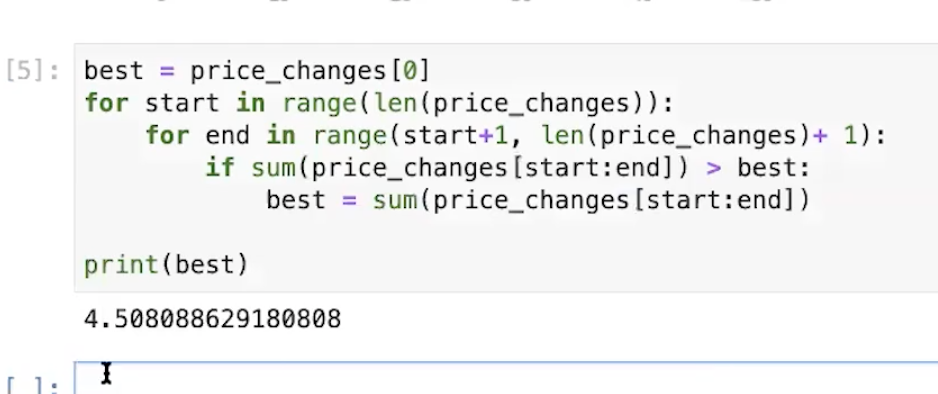

---

# What is the run time of this algorithm

### this is big(Theta(n**2))

---

# Next Class (6.8.2)

### intelligent solutoin that accomplishes this with one pass

# KADANE's ALGORITHM

In [22]:
# given an ending point of the window
# what is the best subsequence that ends at 30

# def best_to_end(end):
#     pass

# we no longer have to worry about the start
# we just worry about hte end

best_to_end =  0 # this assumse we can have a subsequence of 0

best = price_changes[0]

for end in range(len(price_changes)):
#    best_to_end = best_to_end + price_changes[end]
    
    # outlier condition there is a possibility that best_to_end can be negative
    # so, if it goes negative, then we reset to 0
    
    best_to_end = max(best_to_end + price_changes[end], 0)
    
    if best_to_end > best:
        best = best_to_end

print(best)
        
# this assume that the function (best_to_end) exists
# obviously htis was done in the earlier round by cycling through each subsequence

# key assumption
# there is no need to change the start point all the time
# that is the trick

13.918298507806366


<font size = 6, color = red> $\Theta(n)$

### reduced from $\Theta(n^2)$ to $\Theta(n)$